<h1>Biblioteca</h1>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics


<h1>Funções Coringas</h1>

In [2]:
##Exportação do dataframe em Python
##df_excel=df
##df_excel.to_excel (r'C:\Users\Gabriel\Desktop\Mestrado\export_dataframe.xlsx', index = False, header=True)

##Leitura Excel
#df = pd.read_excel(r'C:\Users\Gabriel\Desktop\Mestrado\Testes\TESTE.xlsx')

<h1>Pré-Processamento</h1>

In [3]:
## Dataframe Original
json = pd.read_json('https://jeap.rio.rj.gov.br/dadosAbertosAPI/v2/transporte/veiculos/onibus2')

#Removendo campos em branco
nan_value = float("NaN")
json.replace("", nan_value, inplace=True)
json.dropna(subset = ["linha"], inplace=True)
json['codigoempresa']=json['ordem'].str.slice(1,4)

#Novo Dataframe

ordem=json['ordem']
linha=json['linha']

empresa=[        "Transportes Paranapuan S/A" if s>="100" and s<"105" else
                  "Viação Penha Rio Ltda" if s>="105" and s<"115" else
                  "Viação Vila Real S/A" if s>="115" and s<"120" else
                  "Expresso Recreio Ltda" if s>="120" and s<"125" else
                  "Viação Normandy To Triângulo Ltda" if s>="125" and s<"130" else
                  "Transportes Barra Ltda" if s>="130" and s<"170" else 
                  "Auto Viação Palmares Ltda" if s>="170" and s<"255" else
                  "Roviária Âncora Matias" if s>="225" and s<"270" else
                  "Caprichosa Auto Ônibus Ltda" if s>="270" and s<"275" else
                  "Transportes Vila Isabel S/A " if s>="275" and s<"285" else
                  "Viação Ideal S/A" if s>="285" and s<"290" else
                  "Empresa Braso Lisboa" if s>="290" and s<"300" else 
                  "Transportes Futuro Ltda" if s>="300" and s<"310" else 
                  "Viação VG Eireli ME" if s>="310" and s<"325" else 
                  "Viação Pavuenense S/A" if s>="325" and s<"410" else 
                  "Real Auto Ônibus Ltda" if s>="410" and s<"425" else 
                  "Viação Acari S/A" if s>="425" and s<"445" else 
                  "Auto Viação Três Amigos Ltda" if s>="445" and s<"475" else
                  "Viação Redentor Ltda" if s>="475" and s<"480" else
                  "Auto Viação Alpha S/A " if s>="480" and s<"500" else
                  "Tijuquinha - Auto Viação Tijuca S/A" if s>="500" and s<"515" else
                  "Viação Novacap S/A" if s>="515" and s<"535" else
                  "Transportes Campo Grande Ltda" if s>="535" and s<"580" else
                  "Viação Nossa Senhora de Lourdes Ltda" if s>="580" and s<"630" else
                  "Gire Transportes Ltda" if s>="630" and s<"710" else
                  "Viação Verdun S/A" if s>="710" and s<"715" else
                  "Viação Nossa Senhora das Graças Ltda" if s>="715" and s<"720" else
                  "Transurb S/A" if s>="720" and s<"860" else
                  "Auto Viação Jabour Ltda" if s>="860" and s<"870" else
                  "Expresso Pégasso Ltda" if s>="870" and s<"999" 
                   else "BRT Rio S.A"  for s in json['codigoempresa']
] 

codigoempresa=json['ordem'].str.slice(1,4)
latitude=json['latitude']
longitude=json['longitude']
velocidade=json['velocidade']
dataHora=json['dataHora'].astype('datetime64[ns]')

# Criando um Dataframe Parcial
df2= pd.DataFrame(list(zip(ordem,linha,empresa,latitude,longitude,velocidade,dataHora)),columns=['ordem','linha','empresa','latitude','longitude','velocidade','dataHora'])

#Ajuste de Fuso Horário através do Pandas
DataHoraOriginalChange=df2['dataHora']
df2['dataHoraBrasil']=pd.to_datetime(DataHoraOriginalChange, unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Catamarca')

#visualização Parcial do Dataframe
df2



,ordem,linha,empresa,latitude,longitude,velocidade,dataHora,dataHoraBrasil
0,B32615,399,Viação Pavuenense S/A,-22.89590,-43.56110,9,2022-06-10 05:38:30,2022-06-10 02:38:30-03:00
1,D13352,745,Transportes Barra Ltda,-22.87996,-43.35793,2,2022-06-10 07:10:29,2022-06-10 04:10:29-03:00
2,C47620,SPB390,Viação Redentor Ltda,-22.95212,-43.35014,0,2022-06-10 07:31:26,2022-06-10 04:31:26-03:00
3,D87206,822,Expresso Pégasso Ltda,-22.91688,-43.60806,0,2022-06-10 07:57:02,2022-06-10 04:57:02-03:00
4,D87206,822,Expresso Pégasso Ltda,-22.91688,-43.60806,0,2022-06-10 07:57:02,2022-06-10 04:57:02-03:00
...,...,...,...,...,...,...,...,...
3527,B11702,908,Viação Vila Real S/A,-22.85803,-43.26746,23,2022-06-10 15:21:58,2022-06-10 12:21:58-03:00
3528,B71001,455,Viação Verdun S/A,-22.97361,-43.18881,13,2022-06-10 15:21:59,2022-06-10 12:21:59-03:00
3529,B71132,455,Viação Verdun S/A,-22.90229,-43.26458,0,2022-06-10 15:22:02,2022-06-10 12:22:02-03:00
3530,B71129,247,Viação Verdun S/A,-22.90331,-43.27670,15,2022-06-10 15:22:03,2022-06-10 12:22:03-03:00


In [4]:
#Dataframe Final 

ordemfinal=df2['ordem']
linhafinal=df2['linha']
empresafinal=df2['empresa']
latitudefinal=df2['latitude']
longitudefinal=df2['longitude']
velocidadefinal=df2['velocidade']

#Data Padrão Brasileiro
data=df2['dataHoraBrasil'].astype("string")
x=data.str.slice(0,10)
final=x.astype('datetime64[ns]')
data2=final.dt.strftime('%d/%m/%Y')

#Hora
hora=df2['dataHoraBrasil'].astype("string")
horafinal=hora.str.slice(11,19)

# Criando um Dataframe Final
dfparcial= pd.DataFrame(list(zip(ordemfinal,linhafinal,empresafinal,latitudefinal,longitudefinal,velocidadefinal,horafinal,data2)),columns=['ordem','linha','empresa','latitude','longitude','velocidade','horario','data'])
dfFinal=dfparcial.drop_duplicates(subset=['latitude','longitude'])

dfFinal


,ordem,linha,empresa,latitude,longitude,velocidade,horario,data
0,B32615,399,Viação Pavuenense S/A,-22.89590,-43.56110,9,02:38:30,10/06/2022
1,D13352,745,Transportes Barra Ltda,-22.87996,-43.35793,2,04:10:29,10/06/2022
2,C47620,SPB390,Viação Redentor Ltda,-22.95212,-43.35014,0,04:31:26,10/06/2022
3,D87206,822,Expresso Pégasso Ltda,-22.91688,-43.60806,0,04:57:02,10/06/2022
5,B58177,623,Viação Nossa Senhora de Lourdes Ltda,-22.92064,-43.22352,0,06:04:25,10/06/2022
...,...,...,...,...,...,...,...,...
3527,B11702,908,Viação Vila Real S/A,-22.85803,-43.26746,23,12:21:58,10/06/2022
3528,B71001,455,Viação Verdun S/A,-22.97361,-43.18881,13,12:21:59,10/06/2022
3529,B71132,455,Viação Verdun S/A,-22.90229,-43.26458,0,12:22:02,10/06/2022
3530,B71129,247,Viação Verdun S/A,-22.90331,-43.27670,15,12:22:03,10/06/2022


In [5]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 0 to 3531
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ordem       3474 non-null   object 
 1   linha       3474 non-null   object 
 2   empresa     3474 non-null   object 
 3   latitude    3474 non-null   float64
 4   longitude   3474 non-null   float64
 5   velocidade  3474 non-null   int64  
 6   horario     3474 non-null   object 
 7   data        3474 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 244.3+ KB


In [6]:
#Lista com as linhas de ônibus não duplicadas

dfFinal['linha'].unique()

# Exportação Excel Linhas mão duplicadas

# X=dfFinal['linha'].unique()
# DFLINHA= pd.DataFrame(list(zip(X)),columns=['ordem'])
# df_excel=DFLINHA
# df_excel.to_excel (r'C:\Users\Gabriel\Desktop\Mestrado\linha.xlsx', index = False, header=True)


array(['399', '745', 'SPB390', '822', '623', '862', '343', '793', '920',
       '583', '298', '795', '461', '615', '112', '2343', '804', '265',
       '771', '801', '2336', '472', 'SV774', '474', '665', '296', '685',
       'SP805', '292', '731', '550', '838', '746', '328', '383', '2114',
       '460', '905', '2111', '600', '687', '321', '2803', '2342', '613',
       '790', '355', '102', '315', '108', '863', '946', '756', '610',
       '794', '766', '100', '2345', '341', '371', '936', '110', '394',
       '919', '817', '812', '803', '390', '926', '629', 'SP343', '774',
       '893', '880', '892', '712', '105', '852', '770', '638', '483',
       '2310', '463', '554', '2303', '302', '324', '2337', '861', '777',
       '232', '309', '492', '2802', '906', '432', '692', '2344', '866',
       '485', '2339', '362', '378', '329', '918', '397', '884', '2335',
       '608', '350', '627', '2381', '607', '840', '639', '220', '548',
       '606', '361', '323', '342', '2804', '325', '2383', '925', '

<h1>Dataframe Velocidade por linhas de ônibus</h1>

In [7]:
## Daframe Velocidade por linhas de ônibus


#Filtros de Velocidade Por Linha

linha770=(dfFinal.loc[(dfFinal['linha']=="770") & (dfFinal['velocidade']!=0),['velocidade']])
L770=linha770.rename(columns={'velocidade':'Linha770'})

linha803=(dfFinal.loc[(dfFinal['linha']=="803") & (dfFinal['velocidade']!=0),['velocidade']])
L803=linha803.rename(columns={'velocidade':'Linha803'})

linha343=(dfFinal.loc[(dfFinal['linha']=="343") & (dfFinal['velocidade']!=0),['velocidade']])
L343=linha343.rename(columns={'velocidade':'Linha343'})

linha550=(dfFinal.loc[(dfFinal['linha']=="550") & (dfFinal['velocidade']!=0),['velocidade']])
L550=linha550.rename(columns={'velocidade':'Linha550'})

linha555=(dfFinal.loc[(dfFinal['linha']=="555") & (dfFinal['velocidade']!=0),['velocidade']])
L555=linha555.rename(columns={'velocidade':'Linha555'})

linha779=(dfFinal.loc[(dfFinal['linha']=="779") & (dfFinal['velocidade']!=0),['velocidade']])
L779=linha779.rename(columns={'velocidade':'Linha779'})

linha383=(dfFinal.loc[(dfFinal['linha']=="383") & (dfFinal['velocidade']!=0),['velocidade']])
L383=linha383.rename(columns={'velocidade':'Linha383'})

linha945=(dfFinal.loc[(dfFinal['linha']=="945") & (dfFinal['velocidade']!=0),['velocidade']])
L945=linha945.rename(columns={'velocidade':'Linha945'})

#Conversão dos Filtros para lista

X1=L770['Linha770'].tolist()
X2=L803['Linha803'].tolist()
X3=L343['Linha343'].tolist()
X4=L550['Linha550'].tolist()
X5=L555['Linha555'].tolist()
X6=L779['Linha779'].tolist()
X7=L383['Linha383'].tolist()
X8=L945['Linha945'].tolist()


#Dataframe Velocidade
df = pd.DataFrame({
    
    'LINHA770': pd.Series(X1,dtype='float64'),
    'LINHA803': pd.Series(X2,dtype='float64'),
    'LINHA343': pd.Series(X3,dtype='float64'),
    'LINHA550': pd.Series(X4,dtype='float64'),
    'LINHA555': pd.Series(X5,dtype='float64'),
    'LINHA779': pd.Series(X6,dtype='float64'),
    'LINHA383': pd.Series(X7,dtype='float64'),
    'LINHA945': pd.Series(X8,dtype='float64')
})

df_velocidade_linhas=df.replace(np.nan, 0)
df_velocidade_linhas



,LINHA770,LINHA803,LINHA343,LINHA550,LINHA555,LINHA779,LINHA383,LINHA945
0,1.0,29.0,9.0,56.0,11.0,39.0,32.0,28.0
1,7.0,27.0,68.0,30.0,19.0,13.0,26.0,0.0
2,15.0,4.0,16.0,18.0,42.0,29.0,58.0,0.0
3,35.0,15.0,49.0,45.0,66.0,47.0,33.0,0.0
4,28.0,24.0,42.0,8.0,0.0,22.0,42.0,0.0
5,22.0,16.0,12.0,23.0,0.0,17.0,54.0,0.0
6,41.0,25.0,36.0,44.0,0.0,0.0,38.0,0.0
7,12.0,24.0,26.0,11.0,0.0,0.0,16.0,0.0
8,13.0,13.0,24.0,20.0,0.0,0.0,49.0,0.0
9,64.0,9.0,16.0,16.0,0.0,0.0,17.0,0.0


<h1> Gráfico de X-Barra E R (Amplitude) - Velocidade em relação as linhas de Ônibus</h1>

All points within control limits.
All points within control limits.


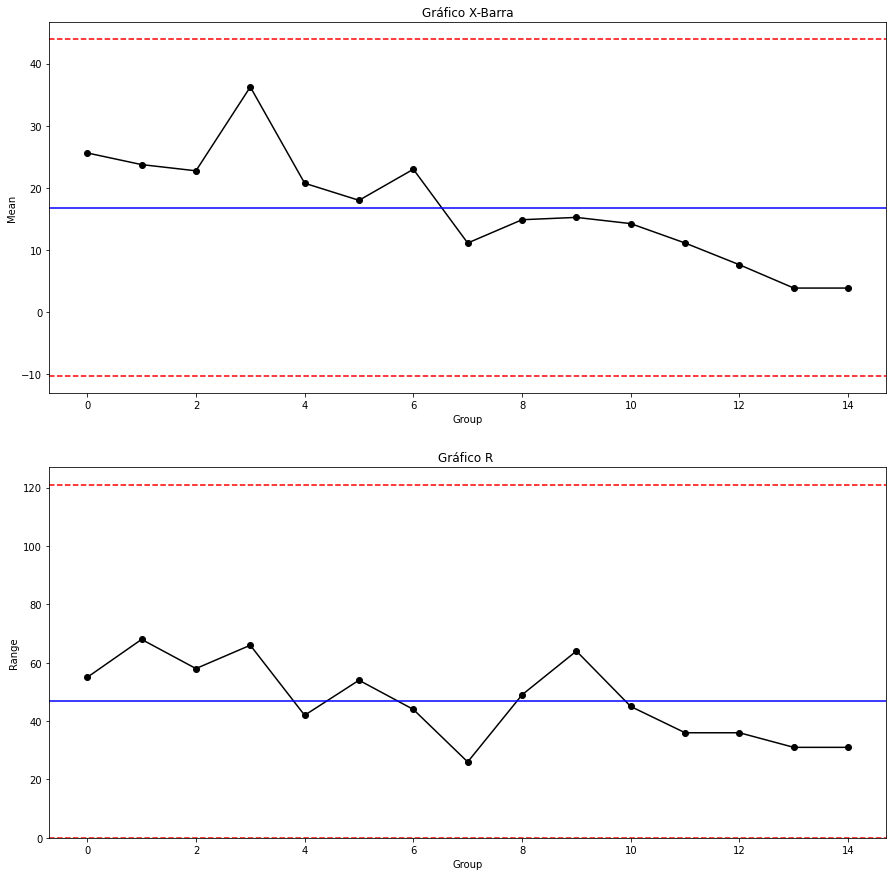

In [8]:

x = np.array(df_velocidade_linhas[['LINHA770','LINHA803','LINHA343','LINHA550','LINHA555','LINHA779','LINHA383',
                  'LINHA945']])

# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('Gráfico X-Barra')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((2.574*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((0*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('Gráfico R ')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+0.577*statistics.mean(r) or group < statistics.mean(x_bar)-0.577*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > 2.574*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

   